In [2]:
%matplotlib inline
import networkx as nx
import json
from IPython.display import HTML
from networkx.algorithms import community
#import community
import matplotlib.pyplot as plt

graphsize = 250
nodes = {}
links = {}
Graph = nx.barabasi_albert_graph(graphsize, 4)
#partition = community.k_clique_communities(Graph, 5)
dc = nx.degree_centrality(Graph)
j = "" # JSON object
j = j + "{"    
j = j + """\t"nodes": ["""

for n in nx.nodes(Graph):
    nodes[n] = {}
    nodes[n]['name'] = n
    #nodes[n]['group'] = partition[n]
    nodes[n]['dc'] = dc[n]
for n in nodes:
    j = j + str(json.dumps(nodes[n])) + ",\n"
j = j[:-2]
j = j + "\t],\n"
j = j + """\t"links":[\n"""
for link in nx.edges(Graph):
    links[str(link)] = {}
    links[str(link)]['source'] = link[0]
    links[str(link)]['target'] = link[1]
for l in links:
    j = j + str(json.dumps(links[l])) + ",\n"
j = j[:-2]
j = j + "\t]\n"
j = j + "}"

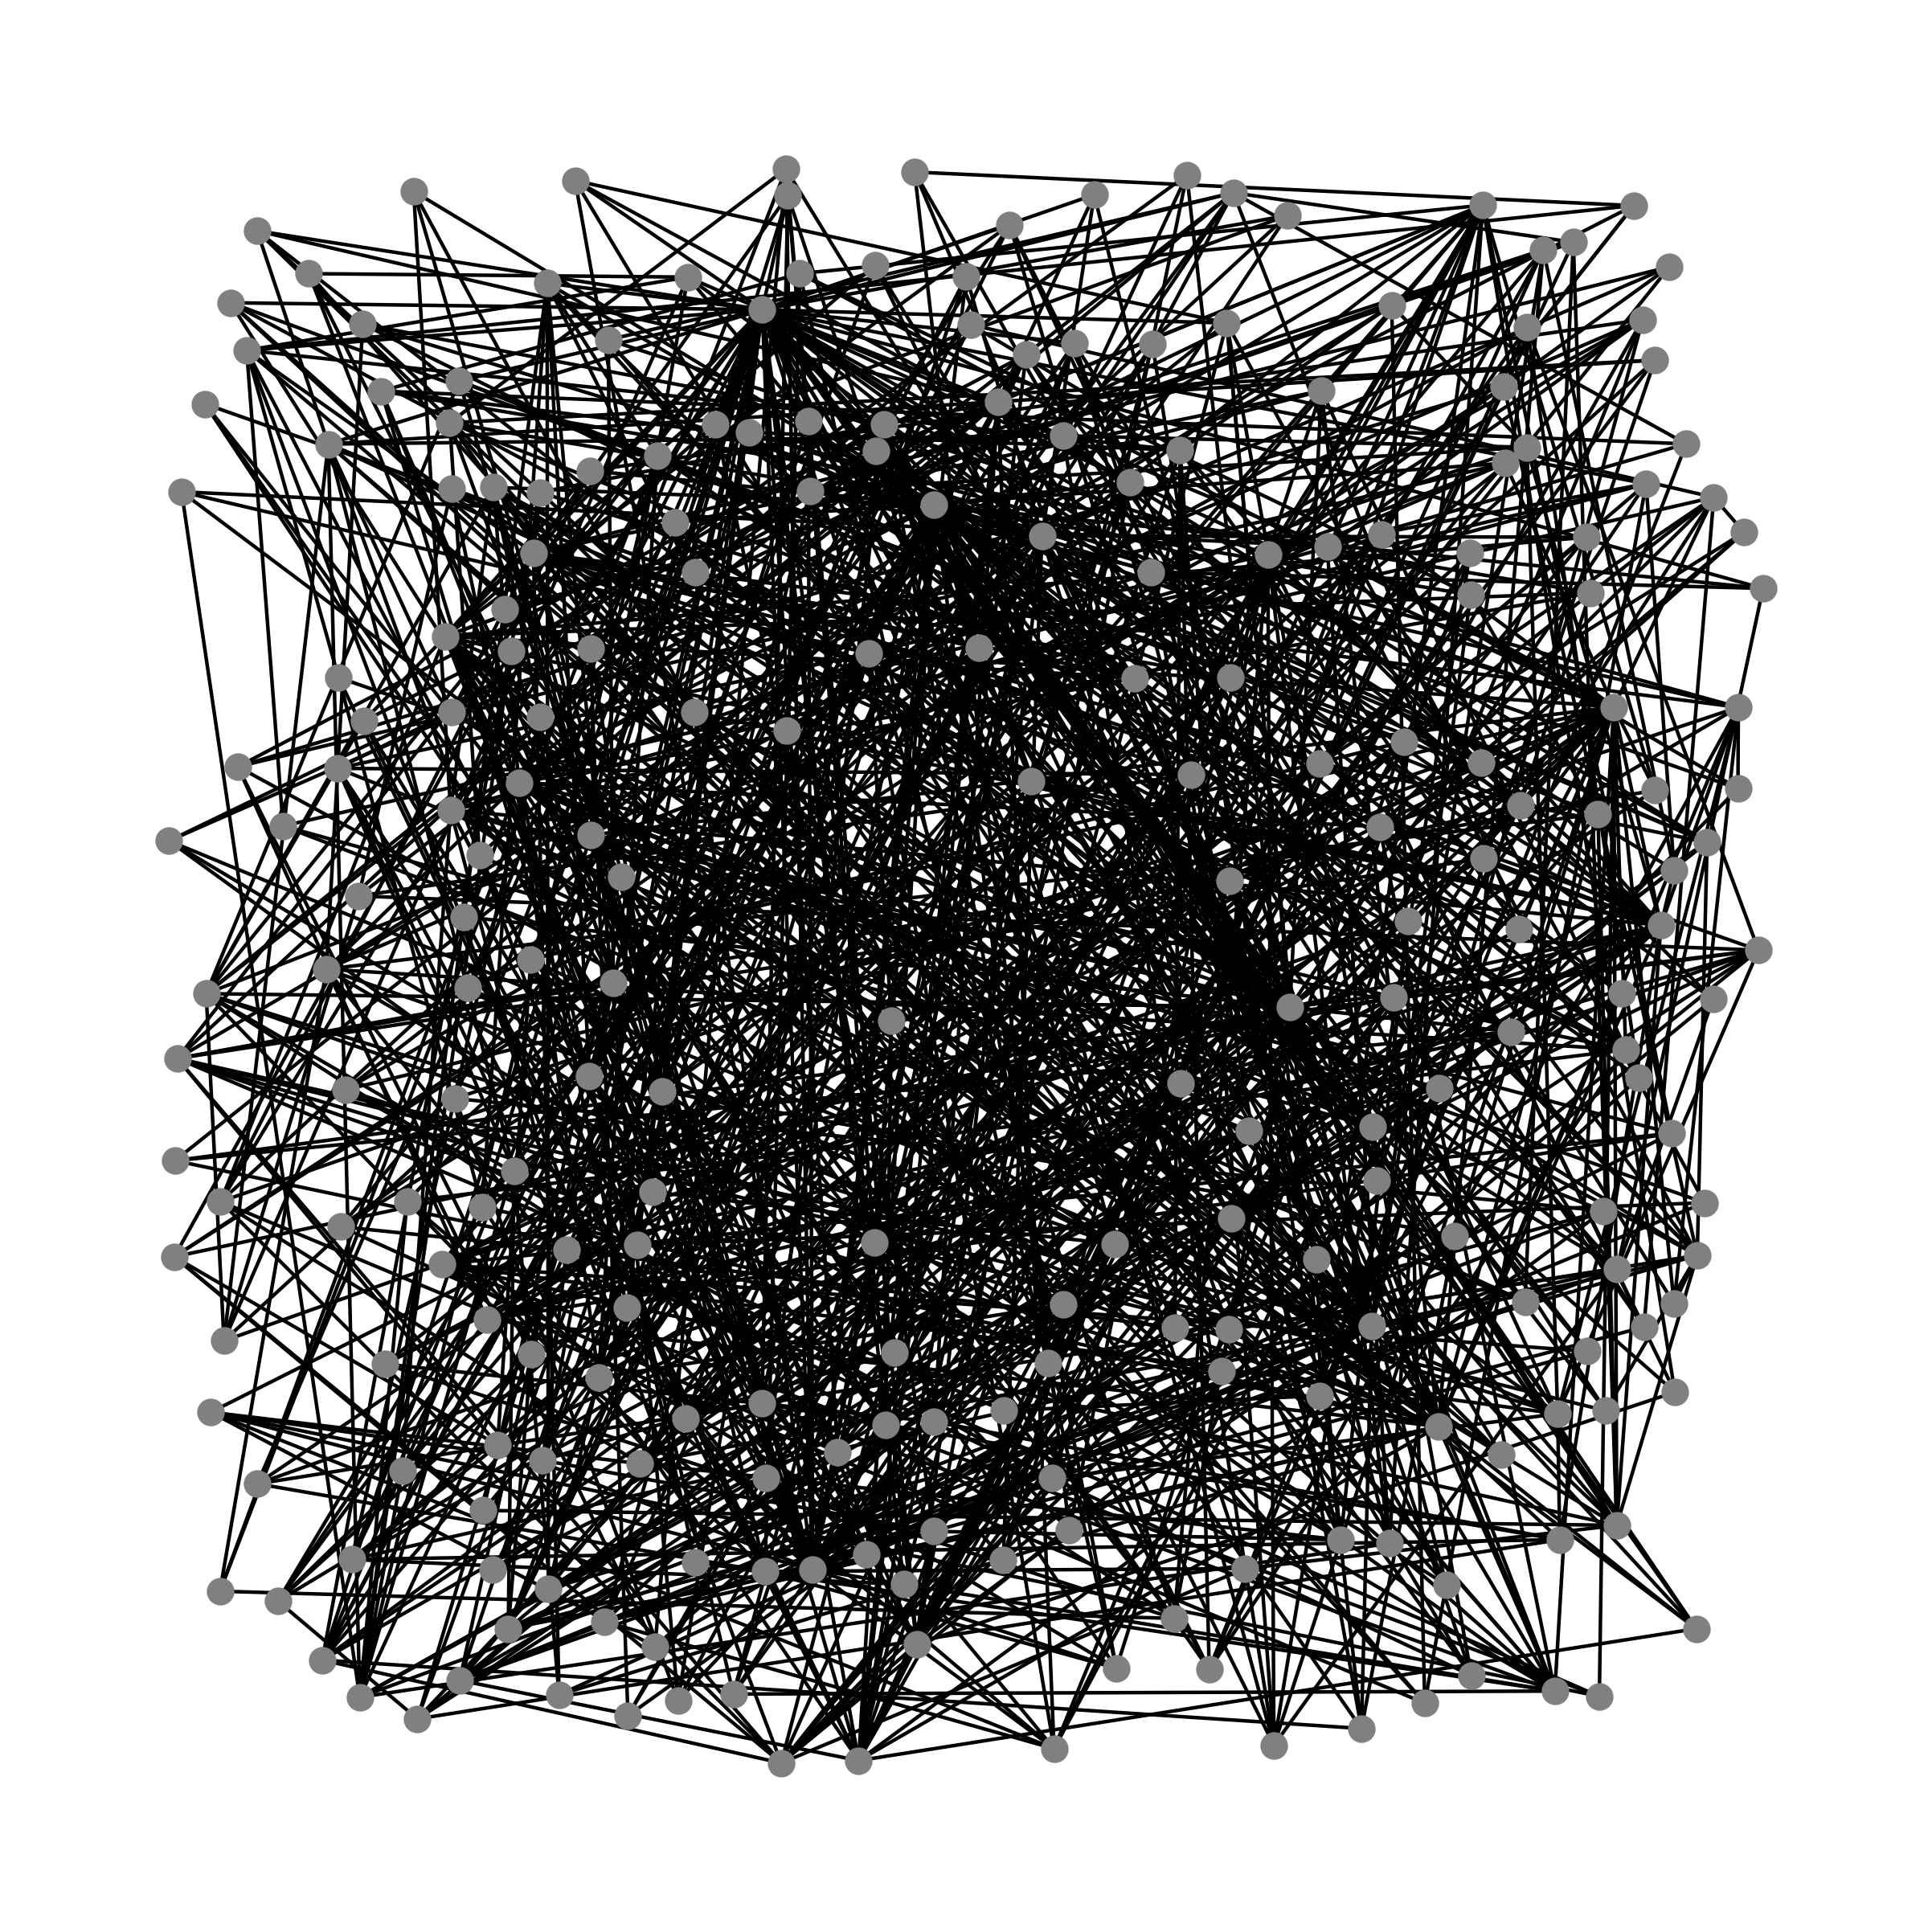

In [3]:
#nx.draw_spring(Graph)
fig = plt.figure(1, figsize=(120, 120), dpi=20)
pos = nx.spring_layout(Graph, k=5, iterations=2)
nx.draw(Graph, node_size=15000, node_color="grey", pos=pos, width = 16)

#nx.draw(Graph )

In [3]:
html_code ="""
<html>
  <head>
    <script type="text/javascript">
        graph = %s;
    </script>
  </head>
  <body>
      <div id="graph"></div>
  </body>
</html>""" % (j)
HTML(html_code)

In [4]:
%%javascript

require.config({paths: {d3: "//d3js.org/d3.v4.min",}});

require(["d3"], function(d3) {
    var width = 850,
    height = 850;
    var color = d3.scaleOrdinal(d3.schemeCategory10);

    var simulation = d3.forceSimulation()
        .force("link", d3.forceLink().id(function(d) { return d.name; }).distance(function(d) { return 1;5 }).strength(.05))
        .force("charge", d3.forceManyBody())
        .force("collide", d3.forceCollide(25))
        .force("center", d3.forceCenter(width /2, height /2));
    
    
    // append SVG to body of index.html with height and width specified above
    d3.select("div#graph").select("svg").remove();
    var svg = d3.select("div#graph").append("svg")
        .attr("width", width)
        .attr("height", height);

    // this actually adheres the data to the force base layout and starts the layout


    var link = svg.selectAll(".link").data(graph.links)
        .enter().append("line")
        .attr("class", "link")
        .style("stroke", "#999")
        .style("stroke-width", "1.2px");

    // append the nodes with specified data and style properties
    var node = svg.selectAll(".node").data(graph.nodes)
        .enter().append("circle")
        .attr("class", "node")
        .attr("r", 5)
        .style("stroke", "#fff")
        .style("stroke-width", "1.5px")
        //.style("fill", "steelblue")
        .style("fill", "gray" )
      .call(d3.drag()
          .on("start", dragstarted) 
          .on("drag", dragged)
          .on("end", dragended));
    // attach titles to nodes, so when the mouse hovers over the nodes it projects the name
    node.append("title")
        .text(function(d) { return d.name; });
    
    simulation
        .nodes(graph.nodes)
        .on("tick", ticked);

   simulation.force("link")
        .links(graph.links);    
    // this is the main mechanism of the force based diagram
    // which moves the nodes and links from their starting and finishing positions
    // once it hits equilibrium, it will stop moving the positions
    function ticked() {
        link.attr("x1", function(d) { return d.source.x; })
            .attr("y1", function(d) { return d.source.y; })
            .attr("x2", function(d) { return d.target.x; })
            .attr("y2", function(d) { return d.target.y; });
        node.attr("cx", function(d) { return d.x; })
            .attr("cy", function(d) { return d.y; });
    };
    
    
    function dragstarted(d) {
        if (!d3.event.active) simulation.alphaTarget(0.3).restart();
        d.fx = d.x;
        d.fy = d.y;
    }

    function dragged(d) {
        d.fx = d3.event.x;
        d.fy = d3.event.y;
    }

    function dragended(d) {
        if (!d3.event.active) simulation.alphaTarget(0);
        d.fx = null;
        d.fy = null;
    }
    

});

<IPython.core.display.Javascript object>

In [12]:
html_code ="""
<html>
  <head>
    <script type="text/javascript">
        graph = %s;
    </script>
  </head>
  <body>
      <div id="graph"></div>
  </body>
</html>""" % (j)
HTML(html_code)

## TODO Jan 15  For SUKI
* Schedule to 2022 ( list of benchmarks)
* Small network samples (manually created)

## how to represent relationship?
1. For folders: pretty straight forward : root -> subfolder
2. for flat files, if text, tf-idf --> for that you need to extract text and do keyword extraction && || n-gram

In [1]:
import os
data_folder = '/Users/itsukiogihara/Projects/NLP/text'
os.chdir(data_folder)
os.listdir()

['RLAlgsInMDPs.txt',
 'Stochastic_Differential_Equations_An_Introduction_.txt',
 'Algorithms__Sanjoy_Dasgupta_Christos_H._Papadimitriou_and_Umesh_V._Vazirani.txt',
 'Introduction_to_Linear_Regression_Analys.txt',
 'TextRank.txt',
 'bandit_algo.txt',
 'The_Algorithm_Design_Manual.txt',
 'alppaydin_machinelearning_2010.txt',
 'thinkbayes.txt',
 'Algorithm_Design.txt',
 'Rule_Based_Machine_Learning.txt',
 'Algorithms_on_Strings_Trees_and_Sequences_[Gusfield_19970528].txt',
 'SuttonBartoIPRLBook2ndEd.txt',
 'Maxime_Crochemore_Cristophe_Hancart_Thierry_Lecroq._Algorithms_on_Strings.txt',
 'Splusdiscrete2.txt',
 'Bioinformatics_algorithms._Vol.1_an_active_learning_approach_by_Compeau_Phillip_Pevzner_Pavel_(zlib.org).txt',
 'neuron.txt',
 'Pearl_Causal_Inference_in_stat.txt',
 'chopra05.txt',
 'Algorithms_and_Complexity_Herbert_Wilf.txt',
 'inception.txt',
 'Intro_to_Algorithm_Cormen.txt',
 '(UNITEXT_88)_Shair_Ahmad_Antonio_Ambrosetti_(auth.)A_Textbook_on_Ordinary_Differential_EquationsSpring

# Getting text off of .pdf

In [7]:
import pdfplumber
FILE = '/Users/itsukiogihara/Documents/SCAN/Unprocessed/1078JC.pdf'
pdf = pdfplumber.open(FILE)
#print(pdf.pages)
page = pdf.pages[0]
text = page.extract_text()
# print(text)  # not working


''

In [17]:
pdftotext = "C:\\Users\\ituki\\Documents\\Projects\\xpdf-tools-win-4.03\\bin64\\pdftotext"
FILE = '.\\inception.pdf'
command = "pdftotext" + " " + FILE
os.system(command)


0

In [20]:
# Example to run CMD in pyhon 
#data = 'C:\\Users\\ituki\\Do\\Graph_Vis\\data\\'
command = "FOR /R %%f IN (*.pdf) DO echo %%f"
os.system(command)

1

In [19]:
# bash command to convert pdf to txt in directory f
"for /r %f in (*.pdf) do call pdftotext  %f "

'for /r %f in (*.pdf) do call pdftotext  %f '

In [ ]:
# renaming files with " " (space) replacing with "_" (uderscore)
import re
rootdir = 'C:\\Users\\ituki\\Documents\\Projects\\Graph_Vis\\data\\'

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        new_file = re.sub(" ", "_", file)
        new_file = re.sub(",", "", new_file)
        new_file = re.sub("-", "", new_file)
        if new_file != file:
            os.rename(file, new_file)
        #os.system(command)
        #print(os.path.join(subdir, file))

# Keyword Extraction

In [8]:
# Downloading helper functions
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/itsukiogihara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/itsukiogihara/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/itsukiogihara/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# How to extrac text from a Web page

In [15]:
res = []
import trafilatura
url = "https://www.economist.com/business/2022/01/15/remote-work-and-the-importance-of-writing"
html = trafilatura.fetch_url(url)
text = trafilatura.extract(html)
text_clean = text.replace("\n", " ").replace("\'", "")
res.append(text_clean[0:5000])

In [16]:

url = "https://www.economist.com/films/2022/02/26/what-will-happen-next-in-the-war-in-ukraine"
html = trafilatura.fetch_url(url)
text = trafilatura.extract(html)
text_clean = text.replace("\n", " ").replace("\'", "")
res.append(text_clean[0:5000])

In [17]:
text_file = "TextRank.txt"
with open(text_file, 'r', encoding='cp1252') as f:
    lines = f.read()
clean_lines = lines.replace("\n", " ").replace("\'", "")
#re.sub("\n", " ", lines)
res.append(clean_lines[:5000])

In [18]:

for i, filename in enumerate(os.listdir()):
    if filename.endswith(".txt"):
        text_file = os.path.join("", filename)
        print(i+1, text_file)
        with open(text_file, 'r', encoding = 'cp1252') as f:
            lines = f.read()
        clean_lines = lines.replace("\n", " ").replace("\'", "")
        res.append(clean_lines[3000:8000])
        continue
    else:
        continue

1 RLAlgsInMDPs.txt
2 Stochastic_Differential_Equations_An_Introduction_.txt
3 Algorithms__Sanjoy_Dasgupta_Christos_H._Papadimitriou_and_Umesh_V._Vazirani.txt
4 Introduction_to_Linear_Regression_Analys.txt
5 TextRank.txt
6 bandit_algo.txt
7 The_Algorithm_Design_Manual.txt
8 alppaydin_machinelearning_2010.txt
9 thinkbayes.txt
10 Algorithm_Design.txt
11 Rule_Based_Machine_Learning.txt
12 Algorithms_on_Strings_Trees_and_Sequences_[Gusfield_19970528].txt
13 SuttonBartoIPRLBook2ndEd.txt
14 Maxime_Crochemore_Cristophe_Hancart_Thierry_Lecroq._Algorithms_on_Strings.txt
15 Splusdiscrete2.txt
16 Bioinformatics_algorithms._Vol.1_an_active_learning_approach_by_Compeau_Phillip_Pevzner_Pavel_(zlib.org).txt
17 neuron.txt
18 Pearl_Causal_Inference_in_stat.txt
19 chopra05.txt
20 Algorithms_and_Complexity_Herbert_Wilf.txt
21 inception.txt
22 Intro_to_Algorithm_Cormen.txt
23 (UNITEXT_88)_Shair_Ahmad_Antonio_Ambrosetti_(auth.)A_Textbook_on_Ordinary_Differential_EquationsSpringer_International_Publishing_(2

In [19]:
res[0]

'THE PANDEMIC has given a big shove to all forms of digital communication. Video-conferencing platforms have become verbs. Venture capitalists make their bets after watching virtual pitches. Products like Loom and mmhmm help workers send pre-recorded video messages to their colleagues. More than a third of Slack users each week are now “huddling”—using the product’s new audio feature to talk to each other. And all this is before the metaverse turns everyone into an avatar. A workplace dominated by time on screens may seem bound to favour newer, faster and more visual ways of transmitting information. But an old form of communication—writing—is also flourishing. And not just dashed-off emails and entries on virtual whiteboards, but slow, time-intensive writing. The strengths of the written word have not been diminished by the pandemic era. In some ways they are ideally suited to it.* The value of writing is a staple in management thinking. “The discipline of writing something down is th

In [20]:
# a func to get a text from a pdf
File_name = '.\\text\\TextRank.txt'
def get_text_from_txt(File_name):
        with open(File_name, 'r') as f:
            lines = f.read()
        clean_lines = lines.replace("\n", " ").replace("\'", "")
        return clean_lines
TextRank = get_text_from_txt(File_name)
TextRank_Words = TextRank.split(sep=" ")


FileNotFoundError: [Errno 2] No such file or directory: '.\\text\\TextRank.txt'

In [23]:
Words = res[0].split(sep=" ")

# TF-IDF

In [ ]:
from itertools import islice
from tqdm import tqdm
from re import sub
num_lines = sum(1 for line in open("wiki_tfidf_terms.csv", 'r', encoding='utf-8'))
with open("wiki_tfidf_terms.csv", encoding='utf-8') as file:
    dict_idf = {}
    with tqdm(total=num_lines) as pbar:
        for i, line in tqdm(islice(enumerate(file), 1, None)):
            try: 
                cells = line.split(",")
                idf = float(sub("[^0-9.]", "", cells[3]))
                dict_idf[cells[0]] = idf
            except: 
                print("Error on: " + line)
            finally:
                pbar.update(1)

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from numpy import array, log
vectorizer = CountVectorizer()
tf = vectorizer.fit_transform([x.lower() for x in res])
tf = tf.toarray()
tf = log(tf + 1)

In [27]:
tfidf = tf.copy()
words = array(vectorizer.get_feature_names_out())
for k in tqdm(dict_idf.keys()):
    if k in words:
        tfidf[:, words == k] = tfidf[:, words == k] * dict_idf[k]
    pbar.update(1)

100%|██████████| 10099022/10099022 [12:33<00:00, 13408.38it/s]


In [32]:
for j in range(tfidf.shape[0]):
    print("Keywords of article", str(j+1), words[tfidf[j, :].argsort()[-7:][::-1]])

Keywords of article 1 ['equations' 'shair' 'ptp' 'maghsoudi' 'www' 'solutions' 'springer']
Keywords of article 2 ['xtx' 'computational' 'numerical' 'springer' 'statistical' 'xty'
 'statistics']
Keywords of article 3 ['pseudoprimality' 'algorithms' 'primality' 'fulkerson' 'recursive'
 'backtracking' 'chapter']
Keywords of article 4 ['suffix' 'substring' 'ultrametric' 'alignments' 'exercises' 'matching'
 'alignment']
Keywords of article 5 ['graphs' 'exercises' 'dags' 'shortest' 'paths' 'algorithms'
 'multiplication']
Keywords of article 6 ['tardos' 'kleinberg' 'exercises' 'algorithms' 'algorithm' 'graphs'
 'graph']
Keywords of article 7 ['multivariate' 'nonparametric' 'perceptrons' 'estimator' 'regression'
 'clustering' 'exercises']
Keywords of article 8 ['bibliographic' 'exp3' 'bandits' 'stochastic' 'remarks' 'exercises'
 'minimax']
Keywords of article 9 ['compeau' 'pevzner' 'replication' 'dnaa' 'chapter' 'messages'
 'mismatches']
Keywords of article 10 ['discriminative' 'discriminative

# TextRank

In [24]:
# Try just one
from summa import keywords
keywd = keywords.keywords(res[0], words=5)
keywd.split("\n")

['writing', 'write', 'working', 'work', 'worked', 'video', 'prose', 'style']

In [25]:
from summa import keywords
for j in range(len(res)):
    print("Keywords of article", str(j+1), "\n", (keywords.keywords(res[j], words=10)).split("\n"))

Keywords of article 1 
 ['writing', 'write', 'work', 'worked', 'remote working', 'video', 'prose', 'style', 'qualities', 'jan', 'discussion', 'communication', 'communicate']
Keywords of article 2 
 ['intense', 'russia', 'war', 'troops', 'zanny', 'minton', 'construction industry', 'construct', 'joshi', 'world']
Keywords of article 3 
 ['graph ranking', 'graphs extracted', 'vertex', 'web', 'value', 'values', 'textrank', 'extraction', 'extractive', 'algorithms', 'algorithm', 'mihalcea', 'language']
Keywords of article 4 
 ['learn', 'reinforcement learning', 'state', 'states', 'methods', 'algorithms', 'control', 'controlled', 'controller', 'controlling', 'rl', 'term', 'function', 'functions', 'problems', 'problem']
Keywords of article 5 
 ['chapters', 'chapter', 'new', 'x', 'øksendal', 'edition', 'additional', 'addition', 'including', 'included', 'christian', 'nils', 'today', 'todays']
Keywords of article 6 
 ['exercises', 'algorithms', 'algorithm', 'search', 'quantum', 'shortest', 'progra

# TopicRank

In [26]:
# from pytopicrank import TopicRank
# for j in range(len(res)):
#     tr = TopicRank(res[j])
#     print("Keywords of article", str(j+1), "\n", tr.get_top_n(n=5, extract_strategy='first'))
import topicrankpy
from topicrankpy import extractinformation as t
t.extract_all('./text/inception.txt',no_of_phrases) 

ModuleNotFoundError: No module named 'topicrankpy'

# YAKE

In [30]:
#testing on one (short)
from yake import KeywordExtractor
kw_extractor = KeywordExtractor(lan="en", n=1, top=10)
text = res[1]
keywords = kw_extractor.extract_keywords(text=text)
keywords = [x for x, y in keywords]
print(keywords)

['Ukraine', 'Russia', 'war', 'editor', 'Economist', 'joined', 'world', 'defence', 'answer', 'Europe']


In [32]:
import pke

# initialize keyphrase extraction model, here TopicRank
extractor = pke.unsupervised.TopicRank()

# load the content of the document, here document is expected to be in raw
# format (i.e. a simple text file) and preprocessing is carried out using spacy
extractor.load_document(input=res[0], language = "en_core_web_sm")

# keyphrase candidate selection, in the case of TopicRank: sequences of nouns
# and adjectives (i.e. `(Noun|Adj)*`)
extractor.candidate_selection()

# candidate weighting, in the case of TopicRank: using a random walk algorithm
extractor.candidate_weighting()

# N-best selection, keyphrases contains the 10 highest scored candidates as
# (keyphrase, score) tuples
keyphrases = extractor.get_n_best(n=10)

OSError: [E941] Can't find model 'en'. It looks like you're trying to load a model from a shortcut, which is obsolete as of spaCy v3.0. To load the model, use its full name instead:

nlp = spacy.load("en_core_web_sm")

For more details on the available models, see the models directory: https://spacy.io/models. If you want to create a blank model, use spacy.blank: nlp = spacy.blank("en")

In [32]:
from yake import KeywordExtractor
Yake_kw_extractor = KeywordExtractor(lan="en", n=2, top=10)
for j in range(len(res)):
    keywords = Yake_kw_extractor.extract_keywords(text=res[j])
    keywords = [x for x, y in keywords]
    print("Keywords of article", str(j+1), "\n", keywords)

Keywords of article 1 
 ['writing', 'big shove', 'written word', 'work', 'digital communication', 'remote', 'written', 'word', 'time', 'remote work']
Keywords of article 2 
 ['Bringing Order', 'Computer Science', 'Paul Tarau', 'Tarau Department', 'North Texas', 'graph-based ranking', 'ranking model', 'Texas rada,tarau', 'ranking', 'Rada Mihalcea']


# KeyBERT

In [74]:
from keybert import KeyBERT
kw_extractor = KeyBERT('distilbert-base-nli-mean-tokens')

keywords = kw_extractor.extract_keywords(TextRank, stop_words='english')
keywords

[('graphbased', 0.3069),
 ('algorithms', 0.2653),
 ('efi2bna3ecdefto8', 0.244),
 ('matlab', 0.2209),
 ('graphs', 0.2158)]

In [54]:
from keybert import KeyBERT
kw_extractor = KeyBERT('distilbert-base-nli-mean-tokens')
for j in range(len(res)):
    keywords = kw_extractor.extract_keywords(res[j], stop_words='english')
    print("Keywords of article", str(j+1), "\n", keywords)

Keywords of article 1 
 [('mathematics', 0.4161), ('mathematical', 0.4075), ('theorems', 0.3952), ('algebra', 0.3933), ('calculus', 0.3891)]
Keywords of article 2 
 [('mathematics', 0.2767), ('algorithms', 0.2516), ('mathematical', 0.2514), ('algebra', 0.2493), ('arithmetic', 0.2426)]
Keywords of article 3 
 [('algorithms', 0.4824), ('70', 0.4737), ('mpm', 0.466), ('brualdi', 0.4523), ('72', 0.4515)]
Keywords of article 4 
 [('bioinformatics', 0.2922), ('algorithmic', 0.2658), ('algorithm', 0.2593), ('genome', 0.2314), ('fingerprinting', 0.2061)]
Keywords of article 5 
 [('shortest', 0.5604), ('333', 0.5146), ('329', 0.5032), ('randomized', 0.5023), ('exhaustive', 0.4986)]
Keywords of article 6 
 [('professor', 0.3656), ('internet', 0.349), ('algorithms', 0.3199), ('university', 0.2931), ('biology', 0.2891)]
Keywords of article 7 
 [('275', 0.3482), ('106', 0.3443), ('256', 0.3404), ('84', 0.3346), ('135', 0.3309)]
Keywords of article 8 
 [('170', 0.2027), ('333', 0.1817), ('329', 0.17

# Spacy

In [76]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation

In [81]:
extra_words=list(STOP_WORDS)+list(punctuation)+['\n']
nlp=spacy.load('en_core_web_sm')
doc = TextRank
docx = nlp(doc)

In [85]:
all_words=[word.text for word in docx]
Freq_word={}
for w in all_words:
      w1=w.lower()
      if w1 not in extra_words and w1.isalpha():
          if w1 in Freq_word.keys():
              Freq_word[w1]+=1
          else:
              Freq_word[w1]=1

In [90]:
val=sorted(Freq_word.values())
max_freq=val[-10:]
print("Topic of document given :-")
for word,freq in Freq_word.items():
      if freq in max_freq:
          print(word ,end=" ")
      else:
          continue
for word in Freq_word.keys():
       Freq_word[word] = (Freq_word[word]/max_freq[-1])

Topic of document given :-
textrank graph based ranking text keyword extraction vertex set units words keywords 

In [108]:
sent_strength={}
for sent in docx.sents:
      for word in sent :
            if word.text.lower() in Freq_word.keys():
                 if sent in sent_strength.keys():
                     sent_strength[sent]+=Freq_word[word.text.lower()]
                 else:
                     sent_strength[sent]=Freq_word[word.text.lower()]
            else: 
                continue

top_sentences=(sorted(sent_strength.values())[::-1])
#top10percent_sentence=int(0.1*len(top_sentences))
n_sent = 10
top_sent=top_sentences[:n_sent+1]

summary = ""
for sent,strength in sent_strength.items():
        if strength in top_sent:
            summary+=str(sent)
        else:
            continue

# for i in summary:
#     print(i,end="")
print(summary)

TextRank: Bringing Order into Texts Rada Mihalcea and Paul Tarau Department of Computer Science ¡ University of North Texas rada,tarau @cs.unt.edu  Abstract In this paper, we introduce TextRank ­ a graph-based ranking model for text processing, and show how this model can be successfully used in natural language applications.Applying a similar line of thinking to lexical or semantic graphs extracted from natural language documents, results in a graph-based ranking model that can be applied to a variety of natural language processing applications, where knowledge drawn from an entire text is used in making local ranking/selection decisions.The TextRank Model  Graph-based ranking algorithms are essentially a  way of deciding the importance of a vertex within  a graph, based on global information recursively  drawn from the entire graph. Error rate  Convergence curves (250 vertices, 250 edges)  0.18 undirected/unweighted  0.16  undirected/weighted directed/unweighted  0.14  directed/weigh

In [109]:
# testing just summary with Yake
keywords = Yake_kw_extractor.extract_keywords(text=summary)
keywords = [x for x, y in keywords]
keywords

['Bringing Order',
 'Computer Science',
 'Rada Mihalcea',
 'Paul Tarau',
 'Tarau Department',
 'North Texas',
 'graph-based ranking',
 'ranking model',
 'Texas rada,tarau',
 'natural language']

1. Topic Modeling
2. Summarization
3. keyword Exraction (from the file name and the contents)
4. NER

What I wanna do is to map concepts between texts (articles, books, etc...)
Need to get similarity, commonarity, relatedness.... (edges)
- How to quantify edges? 
    - keywords extraction
    - summerization
    - term frequency => the more common words it has the closer. the more oftem the common words appear the closer
    - vectorize - test embedding + similarity score (cosine)
    -> bidirectional? Yes.
    
